# Estadística de fotones

### Bibliotecas

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib

In [2]:
#Versiones

print("Numpy",np.version.version)
print("Pandas",pd.__version__)
print("Matplotlib",matplotlib.__version__)

Numpy 1.18.1
Pandas 0.22.0
Matplotlib 3.3.0


### Parámetros

In [3]:
#Número de fotones
fotones=100000

#Diviciones del tiempo

dt=1e7

# Probabilidad

P=fotones/dt

### Serie de tiempo

In [4]:
serie1 = []

for i in range(int(dt)):
    r=random.random()
    if r <= P:
        serie1.append(1)
        
    else:
        serie1.append(0)

In [5]:
#serie1.to_csv("/home/solaris/Documentos/LFC2/Programas/Programa 3/Datos/serie1.csv")

### Ajuste de la ventana de tiempo

In [6]:
# Ventana de tiempo
v=2000

In [7]:
arr=np.add.reduceat(serie1, np.arange(0, len(serie1), v))
serie2 = arr.tolist()

In [8]:
#Serie obtenida con la ventana de tiempo

serie2;

#serie2.to_csv("/home/solaris/Documentos/LFC2/Programas/Programa 3/Datos/serie2.csv")

### Estadística

In [9]:
#Promedio de fotones por ventana

promedio=np.mean(serie2)
promedio

20.0236

In [10]:
#Número máximo (n_max) de fotones por ventana

maximo=max(serie2)
maximo

39

In [11]:
#casos favorables=frecuencia

favorables=[]
for i in range(maximo+1): #Sumamos 1 ya que por default python inicia el ciclo desde el 0
    f=serie2.count(i)
    favorables.append(f)

In [12]:
favorables;

In [13]:
#Total de casos

casos=sum(favorables)

In [14]:
#cálculo de la probabilidad de encontrar n fotones por ventana

probabilidad=[]
for i in range(len(favorables)):
    
    p=favorables[i]/casos
    
    probabilidad.append(p)

In [15]:
probabilidad;

In [16]:
#La suma de las probabilidades debe ser igual a 1
sum(probabilidad)

1.0

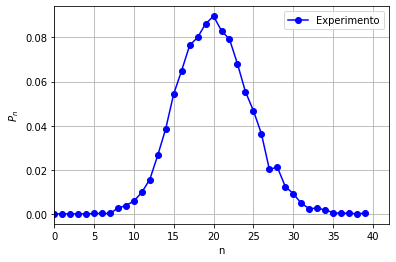

In [17]:
plt.plot(probabilidad,"bo",label="Experimento", linestyle='-')

plt.xlim(0, maximo+3)

plt.xlabel("n")
plt.ylabel("$P_n$")

#plt.title('Ventana de tiempo =%i' %v)
plt.legend(loc=0)

#plt.text(4.3, 0.3, "Ventana de tiempo =%i "%v)

plt.grid()
plt.show()

### Estadística de Poisson

In [18]:
n=maximo+1 #limite del eje x
poisson=[]

for i in  range(n):
    
    #Usamos el promedio de fotones por ventana (promedio de la serie2)
    
    Pn=math.exp(-promedio)*pow(promedio,i)*pow(math.factorial(i),-1)

    poisson.append(Pn)

In [19]:
poisson;

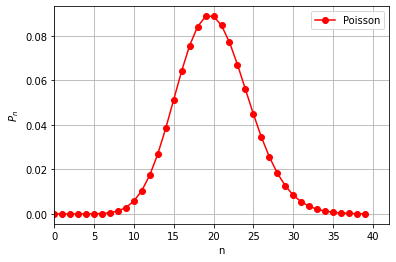

In [20]:
plt.plot(poisson,"ro",label="Poisson", linestyle='-')

plt.xlim(0, maximo+3)

plt.xlabel("n")
plt.ylabel("$P_n$")

plt.legend(loc=0)

plt.grid()
plt.show()

### Comparación de resultados

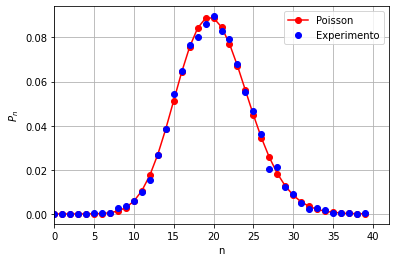

In [21]:
plt.plot(poisson,"ro",label="Poisson", linestyle='-')
plt.plot(probabilidad,"bo",label="Experimento")

plt.xlim(0, maximo+3)

plt.xlabel("n")
plt.ylabel("$P_n$")

plt.legend(loc=0)
#plt.text(5.3, 0.2, "Ventana de tiempo =%i "%v)

plt.grid()
plt.savefig('g3.png')
plt.show()

### Datos estadísticos

Desviación estándar si es estadística Poissoniana

$(\Delta n)^{2}=\bar{n}$

$\Delta n=\sqrt{\bar{n}}$

$1=\frac{\Delta n}{\sqrt{\bar{n}}}$



In [22]:
#Raiz del promedio
a=math.sqrt(promedio)

In [23]:
#Desviación estandar

ds=np.std(serie2)

In [24]:
#Tomamos como medida de error la diferencia entre la desviación estándar y la raíz del promedio

error=abs(a-ds)
error

0.03355666763152332

Varianza

$\operatorname{Var}(n) \equiv(\Delta n)^{2}=\sum_{n=0}^{\infty}(n-\bar{n})^{2} \mathcal{P}(n)$

In [25]:
varianza=np.var(serie2)
varianza

20.325043039999997

Factor de Fano


$F=\frac{\sigma_{W}^{2}}{\mu_{W}}$


https://en.wikipedia.org/wiki/Fano_factor

In [26]:
#Factor de Fano

ff=np.var(serie2)/np.mean(serie2)

In [27]:
ff

1.0150543878223695

In [28]:
#Error promedio

diff=[x1 - x2 for (x1, x2) in zip(poisson, probabilidad)] #Calcula la diferencia de las listas
absolutos = list(map(abs, diff )) #Calcula el valor absoluto de cada elemento
error_promedio=sum(absolutos)/len(absolutos)
error_promedio



0.0009962525662874997

In [29]:
data={"Datos":["Promedio","DS","Varianza","F. Fano", "Error","Error promedio"], "Valor":[promedio,varianza,np.std(serie2),ff,error,error_promedio]}
estadisticos= pd.DataFrame(data) 
estadisticos

,Datos,Valor
0,Promedio,20.023600
1,DS,20.325043
2,Varianza,4.508330
3,F. Fano,1.015054
4,Error,0.033557
5,Error promedio,0.000996


In [30]:
estadisticos.to_csv("/home/solaris/Documentos/LFC2/Programas/Programa 3/Datos/estadisticos.csv")

### Ventana de tiempo fija

In [31]:
#Número de fotones
fotones=100000

#Diviciones del tiempo
dt=1e7

# Probabilidad
P=fotones/dt

# Ventana de tiempo
v=2000


#Repeticiones del experimento
rep=50


promedios=[]
dss=[]
varianzas=[]
fanos=[]
errores=[]
ep=[]

#Ciclo

for j in range(rep):

    serie1 = []

    for i in range(int(dt)):
        r=random.random()
        if r <= P:
            serie1.append(1)

        else:
            serie1.append(0)


    arr=np.add.reduceat(serie1, np.arange(0, len(serie1), v))
    serie2 = arr.tolist()

    promedio=np.mean(serie2)

    maximo=max(serie2)


    favorables=[]
    for i in range(maximo+1):
        f=serie2.count(i)
        favorables.append(f)

    casos=sum(favorables)

    probabilidad=[]
    for i in range(len(favorables)):

        p=favorables[i]/casos

        probabilidad.append(p)

    #POISSON    

    n=maximo+1 #limite del eje x
    poisson=[]

    for i in  range(n):

        #Usamos el promedio de fotones por ventana (promedio de la serie2)

        Pn=math.exp(-promedio)*pow(promedio,i)*pow(math.factorial(i),-1)

        poisson.append(Pn)


    #DATOS ESTADISTICOS

    #Raiz del promedio
    a=math.sqrt(promedio)

    #Desviación estandar
    ds=np.std(serie2)

    #Tomamos como medida de error la diferencia entre la desviación estándar y la raíz del promedio
    error=abs(a-ds)

    #Varianza
    varianza=np.var(serie2)

    #Factor de Fano
    ff=np.var(serie2)/np.mean(serie2)

    #Error promedio

    diff=[x1 - x2 for (x1, x2) in zip(poisson, probabilidad)] #Calcula la diferencia de las listas
    absolutos = list(map(abs, diff )) #Calcula el valor absoluto de cada elemento
    error_promedio=sum(absolutos)/len(absolutos)


    promedios.append(promedio)
    dss.append(ds)
    varianzas.append(varianza)
    fanos.append(ff)
    errores.append(error)
    ep.append(error_promedio)


In [32]:
p_promedios=sum(promedios)/len(promedios)
p_dss=sum(dss)/len(dss)
p_varianzas=sum(varianzas)/len(varianzas)
p_fanos=sum(fanos)/len(fanos)
p_errores=sum(errores)/len(errores)
p_ep=sum(ep)/len(ep)


In [33]:
data_general={"Datos":["Promedio","DS","Varianza","F. Fano", "Error","Error promedio"], "Valor":[p_promedios,p_varianzas,p_dss,p_fanos,p_errores,p_ep]}
estadisticos_generales= pd.DataFrame(data_general) 
estadisticos_generales

,Datos,Valor
0,Promedio,19.999764
1,DS,19.716574
2,Varianza,4.440169
3,F. Fano,0.985853
4,Error,0.039470
5,Error promedio,0.001335


In [34]:
estadisticos_generales.to_csv("/home/solaris/Documentos/LFC2/Programas/Programa 3/Datos/estadisticos_generales.csv")